In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

In [2]:
data = pd.read_csv('carprices.csv')

In [3]:
data.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


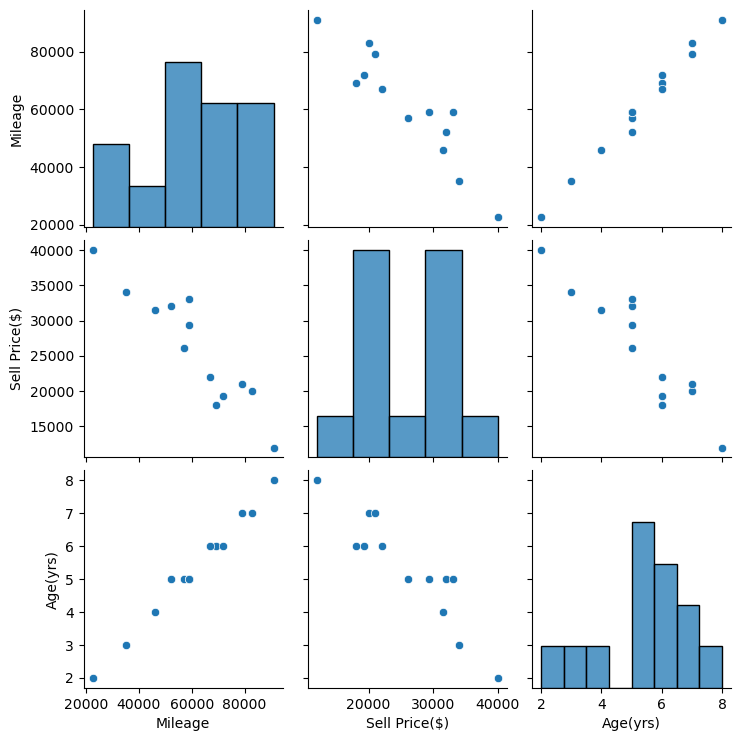

In [4]:
sn.pairplot(data)

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [6]:
le = LabelEncoder()
data['Car Model'] = le.fit_transform(data['Car Model'])

In [7]:
ohe = OneHotEncoder(sparse_output=False)

In [8]:
car_model = ohe.fit_transform(data[['Car Model']])

In [9]:
other_ftrs = np.array(data[['Mileage','Age(yrs)']])

In [10]:
x = np.hstack([car_model,other_ftrs])
y = np.array(data['Sell Price($)'])

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [13]:
lr.predict(np.hstack([ohe.transform([[2]]),[[45000,4]]]))

c:\Users\User\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [14]:
lr.predict(np.hstack([ohe.transform([[1]]),[[86000,7]]]))

c:\Users\User\miniconda3\envs\tf\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([11080.7431322])

In [15]:
lr.score(x,y)

0.9417050937281083